In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
house_pred=pd.read_csv("/content/data (1).csv")

In [ ]:
house_pred.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
house_pred.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
house_pred.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [ ]:
house_pred.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [ ]:
house_pred.CRIM.value_counts

<bound method IndexOpsMixin.value_counts of 0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64>

In [ ]:
house_pred.B.value_counts

<bound method IndexOpsMixin.value_counts of 0      396.90
1      396.90
2      392.83
3      394.63
4      396.90
        ...  
501    391.99
502    396.90
503    396.90
504    393.45
505    396.90
Name: B, Length: 506, dtype: float64>

In [ ]:
house_pred.shape

(506, 14)

In [ ]:
house_pred.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
house_pred.duplicated().sum()

0

In [ ]:
import pandas as pd
import numpy as np

def replace_outliers_with_median(house_pred):
    cols = list(house_pred)
    for column in cols:
        if column in house_pred.select_dtypes(include=np.number).columns:
            q1 = house_pred[column].quantile(0.25)
            q3 = house_pred[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5 * iqr)
            fence_high = q3 + (1.5 * iqr)

            # Replace outliers with median
            median_value = house_pred[column].median()
            house_pred[column] = np.where((house_pred[column] < fence_low) | (house_pred[column] > fence_high), median_value, house_pred[column])

    return house_pred

# Example usage:
# Assuming house_pred is your DataFrame
house_pred_no_outliers = replace_outliers_with_median(house_pred)


In [ ]:
def detect_outliers(house_pred):
    cols = list(house_pred)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols:
        if column in house_pred.select_dtypes(include=np.number).columns:
            q1 = house_pred[column].quantile(0.25)
            q3 = house_pred[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column, 'Number of Outliers':house_pred.loc[(house_pred[column] < fence_low) | (house_pred[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(house_pred)

<ipython-input-13-9bcf90797d53>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append({'Feature':column, 'Number of Outliers':house_pred.loc[(house_pred[column] < fence_low) | (house_pred[column] > fence_high)].shape[0]},ignore_index=True)
<ipython-input-13-9bcf90797d53>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append({'Feature':column, 'Number of Outliers':house_pred.loc[(house_pred[column] < fence_low) | (house_pred[column] > fence_high)].shape[0]},ignore_index=True)
<ipython-input-13-9bcf90797d53>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append({'Feature':column, 'Number of Outliers':house_pred.loc[(house_pred[column] < fence_low) | (house_p

,Feature,Number of Outliers
0,CRIM,91
1,ZN,66
2,INDUS,0
3,CHAS,0
4,NOX,0
5,RM,11
6,AGE,0
7,DIS,0
8,RAD,0
9,TAX,0


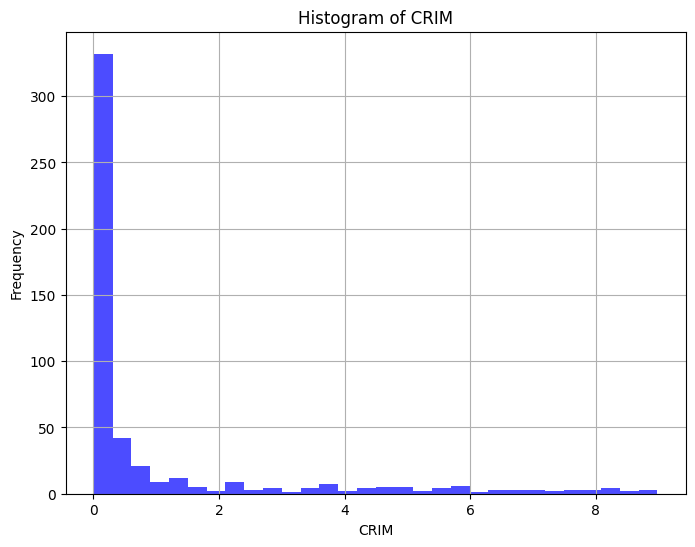

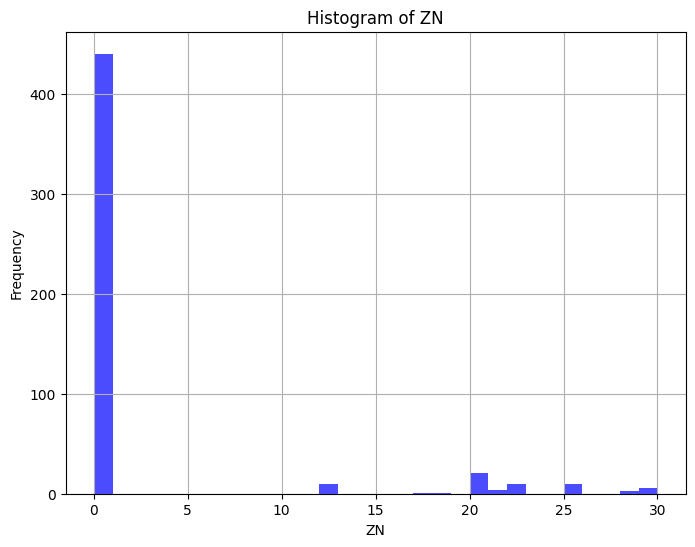

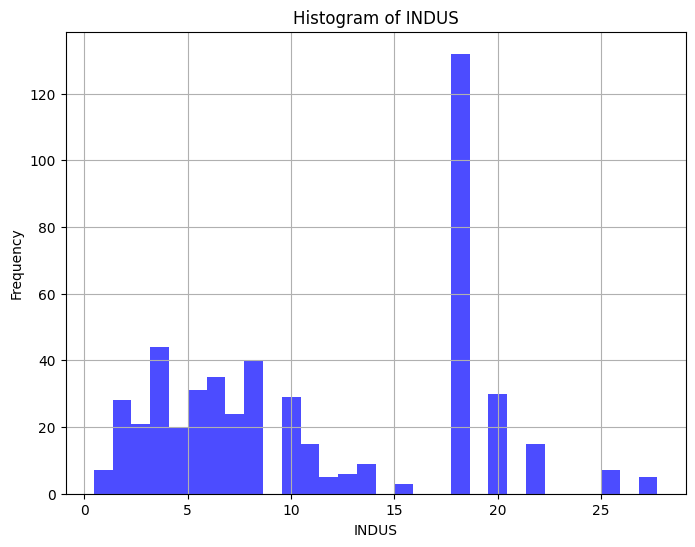

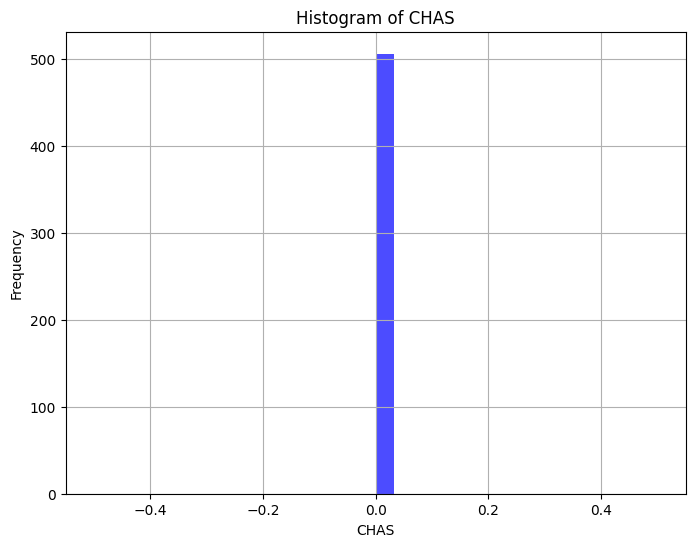

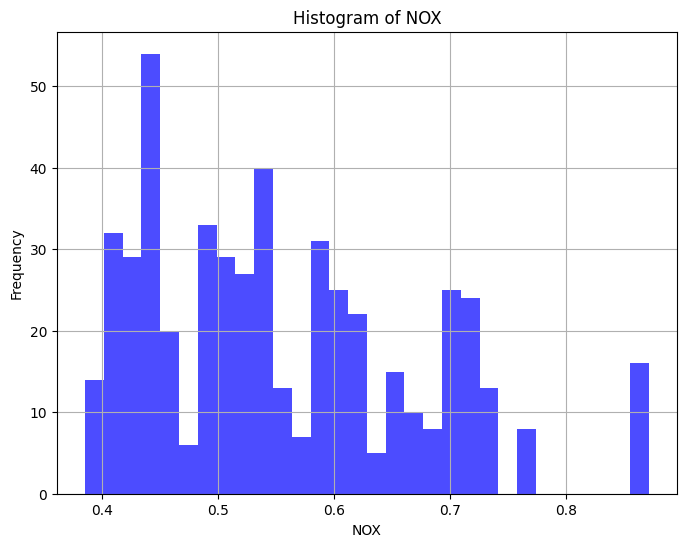

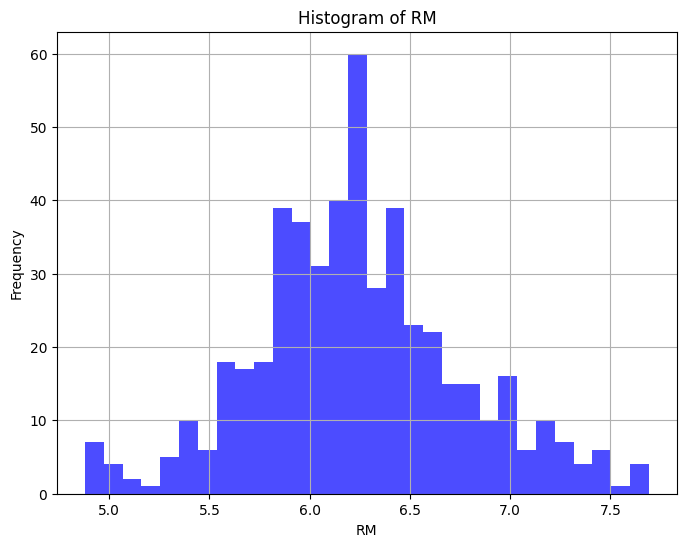

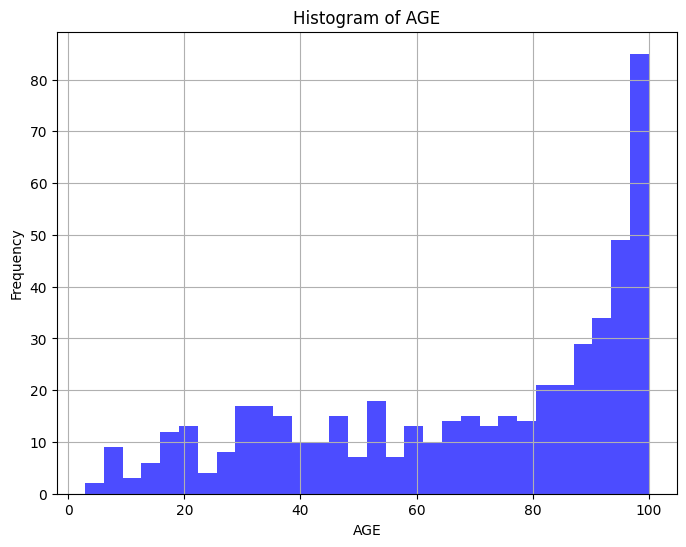

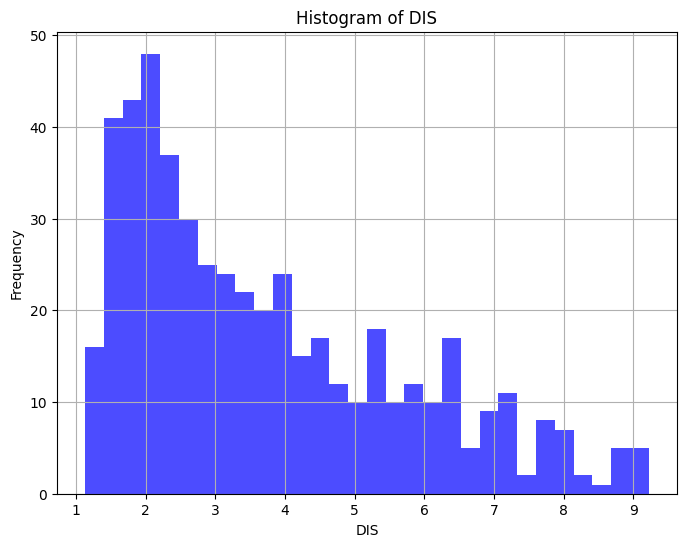

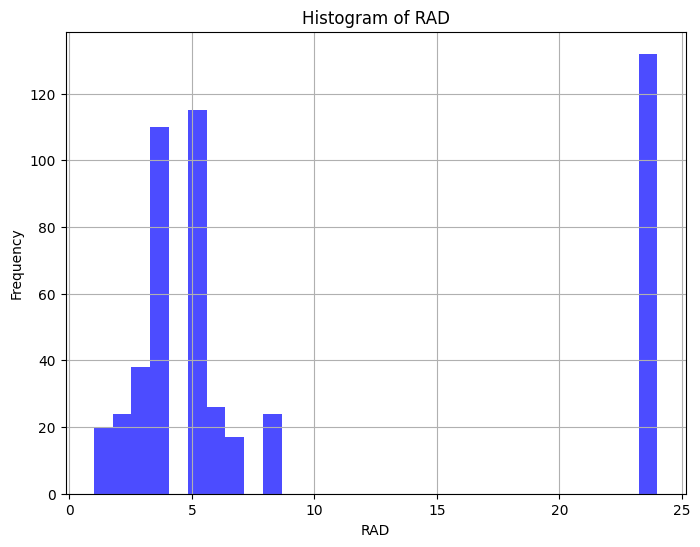

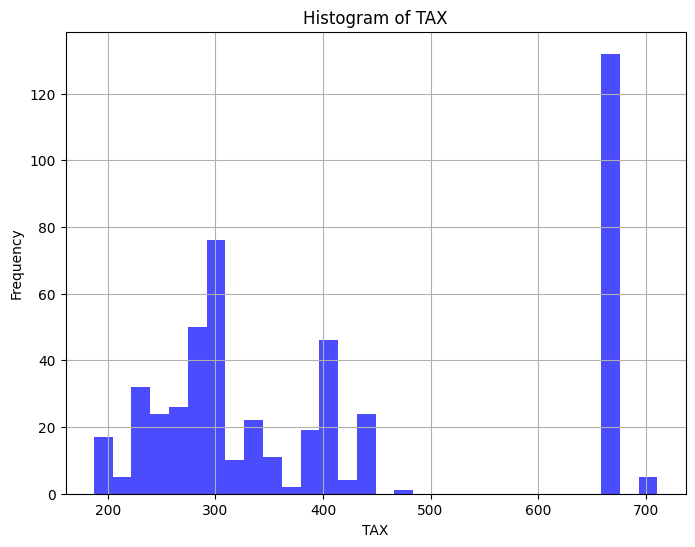

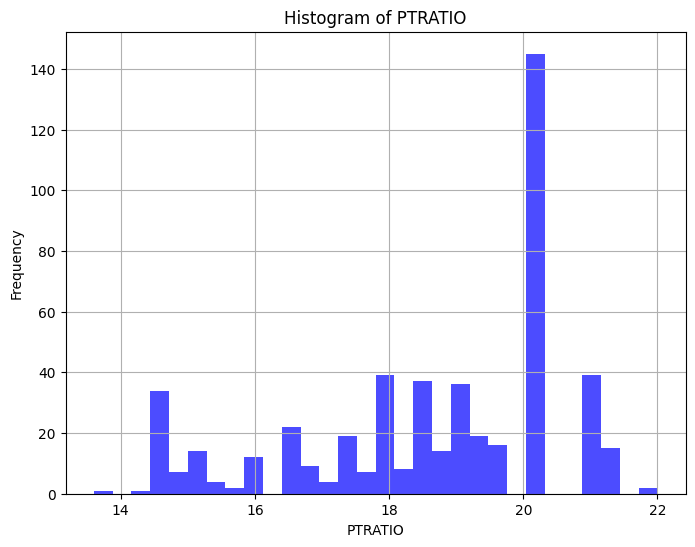

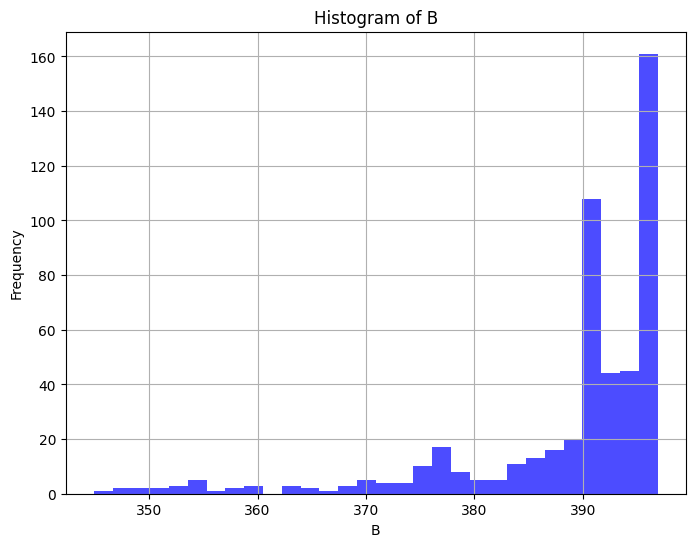

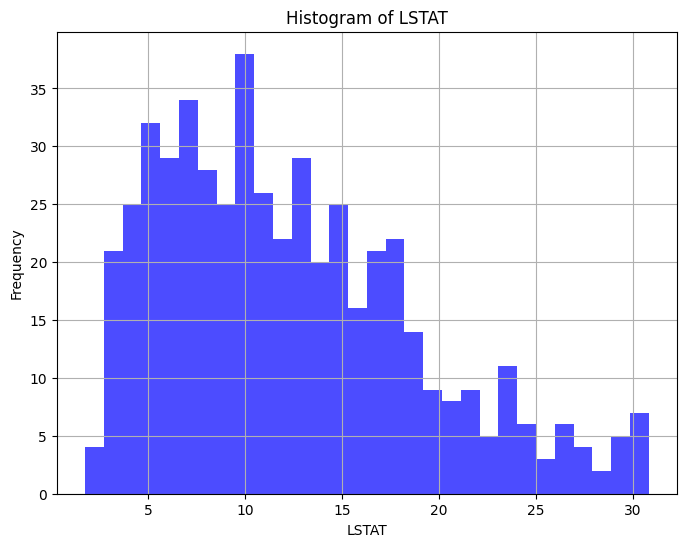

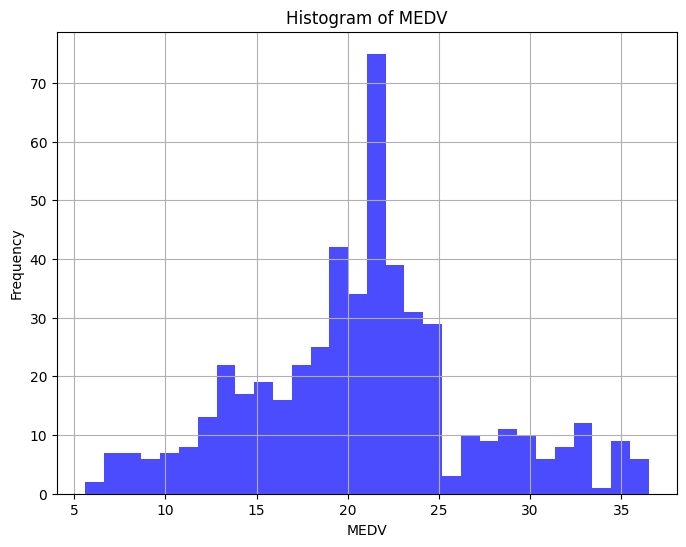

In [ ]:


# Assuming house_pred is your DataFrame
# For simplicity, let's assume you want to plot histograms for all numeric columns
numeric_columns = house_pred.select_dtypes(include=np.number).columns

# Plot histograms for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(house_pred[column], bins=30, color='blue', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [ ]:
house_pred.drop(['CHAS'],axis=1,inplace=True)

In [ ]:
from scipy.stats.mstats import winsorize

# Function to treat outliers

def treat_outliers(house_pred):
    cols = list(house_pred)
    for col in cols:
        if col in house_pred.select_dtypes(include=np.number).columns:
            house_pred[col] = winsorize(house_pred[col], limits=[0.05, 0.1],inclusive=(True, True))

    return house_pred


house_pred = treat_outliers(house_pred)

# Checking for outliers after applying winsorization
# We see this using a fuction called 'detect_outliers', defined above.

detect_outliers(house_pred)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
<ipython-input-13-9bcf90797d53>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append({'Feature':column, 'Number of Outliers':house_pred.loc[(house_pred[column] < fence_low) | (house_pred[column] > fence_high)].shape[0]},ignore_index=True)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArra

,Feature,Number of Outliers
0,CRIM,91
1,ZN,66
2,INDUS,0
3,NOX,0
4,RM,0
5,AGE,0
6,DIS,0
7,RAD,0
8,TAX,0
9,PTRATIO,0


In [ ]:

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler



In [ ]:
x = house_pred.iloc[:,:-1]

# This means that we are using all the columns, except 'MEDV', to predict the house price


# Target
y = house_pred.iloc[:,-1]

In [ ]:
x= x[['CRIM','DIS','RM','LSTAT']]
x.head(2)

,CRIM,DIS,RM,LSTAT
0,0.02763,4.0900,6.575,4.98
1,0.02763,4.9671,6.421,9.14


In [ ]:
mms= MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

x.head()

,CRIM,DIS,RM,LSTAT
0,0.000000,0.507577,0.743020,0.071829
1,0.000000,0.676905,0.645305,0.305275
2,0.000000,0.676905,1.000000,0.018519
3,0.001097,0.888318,1.000000,0.000000
4,0.009585,0.888318,1.000000,0.091470


In [ ]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
lr=LinearRegression()

lr.fit(xtrain, ytrain)

coefficients=pd.DataFrame([xtrain.columns, lr.coef_]).T
coefficients=coefficients.rename(columns={0:'Attributes',1:'Coefficients'})
coefficients

,Attributes,Coefficients
0,CRIM,-0.648554
1,DIS,1.965261
2,RM,3.8317
3,LSTAT,-9.768773


In [ ]:
y_pred=lr.predict(xtrain)

In [ ]:
print("R^2: ",metrics.r2_score(ytrain, y_pred))
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytrain, y_pred))*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytrain, y_pred))
print("MSE: ", metrics.mean_squared_error(ytrain, y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytrain, y_pred)))

R^2:  0.5966561658954883
Adusted R^2:  0.5920333139286744
MAE:  2.801731782590058
MSE:  11.852297928810502
RMSE:  3.442716649509585


In [ ]:
print(metrics.max_error(ytrain, y_pred))

10.253523728812118


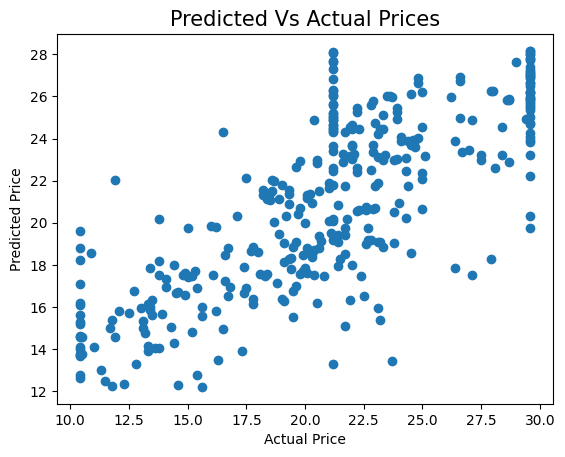

In [ ]:
plt.scatter(ytrain, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()

In [ ]:
ytest_pred=lr.predict(xtest)

lin_acc=metrics.r2_score(ytest, ytest_pred)
print("R^2: ",lin_acc)
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytest, ytest_pred))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytest, ytest_pred))
print("MSE: ", metrics.mean_squared_error(ytest, ytest_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytest, ytest_pred)))

R^2:  0.5827889360528283
Adusted R^2:  0.5714362540406603
MAE:  2.6160202958966594
MSE:  10.973384134909486
RMSE:  3.3126098675982787


In [ ]:
print(metrics.max_error(ytest, ytest_pred))

10.398755233140768


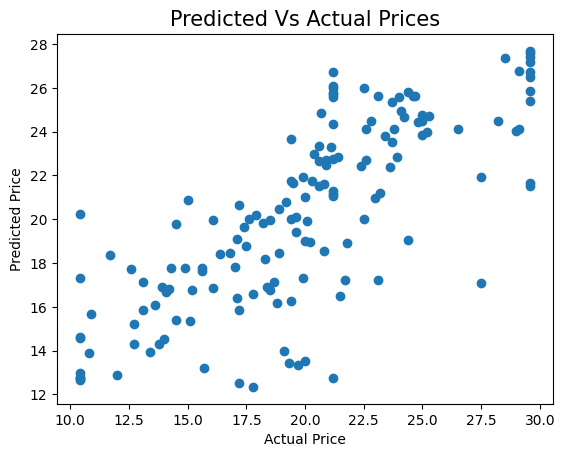

In [ ]:
# visualizing the difference between the actual and predicted price

plt.scatter(ytest, ytest_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()